In [1]:
from MES_RNN.model import *
from utils.metrics import *

import warnings
warnings.simplefilter('ignore')

# check version
print(tf.keras.__version__)
print(tf.__version__)
print(tfp.__version__)
print(tf.config.list_physical_devices('GPU'))



2.4.0
2.4.1
0.12.2
[]


2021-09-07 13:41:48.723776: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [2]:
pre_layer = preprocess(first_time = 0) # change to 1 if first time running so data will be downloaded
df = pre_layer.load_data()
df = pre_layer.clean_data(df)
df = pre_layer.fill_missing(df)
scaled_df, df_scaler = pre_layer.scale(df)
scaled_df

[INFO] countries
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 

,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
2020-01-31,1.000000,1.209803,1.541934,1.211018,1.201940,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-01,1.000000,1.209803,1.541934,1.211018,1.201940,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-02,1.000000,1.210025,1.528711,1.209956,1.200883,1.000162,1.016861,1.034911,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-03,1.000001,1.210026,1.528711,1.209956,1.200883,1.000163,1.016861,1.034911,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-04,1.000001,1.210026,1.528711,1.209956,1.200883,1.000163,1.016861,1.034911,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-02,1.977792,1.997350,1.201365,1.243465,1.176983,1.990998,1.470883,1.447696,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-03,1.983798,1.998256,1.208191,1.242470,1.177632,2.000000,1.477305,1.447696,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-04,1.989006,1.999154,1.211604,1.573242,1.487351,1.904752,1.479246,1.447696,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-05,1.994189,1.999663,1.310468,1.578438,1.491546,1.911344,1.486597,1.447696,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
mes_layer = ES()
params, internals = mes_layer.es(scaled_df)
es_scaled, df_trend, df_seas = mes_layer.deTS(scaled_df, internals)

es_scaled

...loading DataFrame - int_df_14
...loading DataFrame - int_df_07
...loading DataFrame - int_df_08
...loading DataFrame - int_df_17
...loading DataFrame - int_df_09
...loading DataFrame - int_df_03
...loading DataFrame - int_df_12
...loading DataFrame - int_df_06
...loading DataFrame - int_df_18
...loading DataFrame - int_df_16
...loading DataFrame - int_df_13
...loading DataFrame - int_df_19
...loading DataFrame - int_df_15
...loading DataFrame - int_df_10
...loading DataFrame - int_df_11
...loading DataFrame - int_df_02
...loading DataFrame - int_df_05
...loading DataFrame - int_df_00
...loading DataFrame - int_df_04
...loading DataFrame - int_df_01


,total_cases,total_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
2020-01-31,-5.551115e-17,5.551115e-17,0.000000e+00,-0.000004,3.053113e-16,0.000000e+00,-5.595024e-12,0.000000e+00,-9.472684e-03,-9.472684e-03,-9.472684e-03,-9.472684e-03,-9.472684e-03,-9.472684e-03,-9.472684e-03,-9.472684e-03,-9.472684e-03,-9.472684e-03,-9.472684e-03,-9.472684e-03
2020-02-01,0.000000e+00,1.110223e-16,-1.110223e-16,-0.000165,2.185752e-16,-1.110223e-16,-2.747247e-13,1.110223e-16,-1.842057e-02,-1.842057e-02,-1.842057e-02,-1.842057e-02,-1.842057e-02,-1.842057e-02,-1.842057e-02,-1.842057e-02,-1.842057e-02,-1.842057e-02,-1.842057e-02,-1.842057e-02
2020-02-02,5.551115e-17,-5.551115e-17,-5.551115e-17,-0.000010,-7.979728e-17,-5.551115e-17,6.157908e-12,0.000000e+00,-2.684648e-02,-2.684648e-02,-2.684648e-02,-2.684648e-02,-2.684648e-02,-2.684648e-02,-2.684648e-02,-2.684648e-02,-2.684648e-02,-2.684648e-02,-2.684648e-02,-2.684648e-02
2020-02-03,0.000000e+00,5.551115e-17,-1.110223e-16,-0.000040,7.979728e-17,-1.110223e-16,-6.116219e-13,0.000000e+00,-3.475456e-02,-3.475456e-02,-3.475456e-02,-3.475456e-02,-3.475456e-02,-3.475456e-02,-3.475456e-02,-3.475456e-02,-3.475456e-02,-3.475456e-02,-3.475456e-02,-3.475456e-02
2020-02-04,0.000000e+00,-5.551115e-17,-1.110223e-16,0.000049,7.979728e-17,0.000000e+00,-2.662315e-12,1.110223e-16,-4.215015e-02,-4.215015e-02,-4.215015e-02,-4.215015e-02,-4.215015e-02,-4.215015e-02,-4.215015e-02,-4.215015e-02,-4.215015e-02,-4.215015e-02,-4.215015e-02,-4.215015e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-02,1.665335e-16,0.000000e+00,0.000000e+00,0.000142,2.185752e-16,-1.110223e-16,7.321932e-11,3.330669e-16,-5.974468e-07,-5.974468e-07,-5.974468e-07,-5.974468e-07,-5.974468e-07,-5.974468e-07,-5.974468e-07,-5.974468e-07,-5.974468e-07,-5.974468e-07,-5.974468e-07,-5.974468e-07
2021-09-03,-1.110223e-16,-5.551115e-17,5.551115e-17,-0.000304,6.938894e-17,5.551115e-17,2.992717e-12,0.000000e+00,-1.335962e-07,-1.335962e-07,-1.335962e-07,-1.335962e-07,-1.335962e-07,-1.335962e-07,-1.335962e-07,-1.335962e-07,-1.335962e-07,-1.335962e-07,-1.335962e-07,-1.335962e-07
2021-09-04,2.775558e-16,5.551115e-17,-5.551115e-17,0.022215,-7.979728e-17,-1.110223e-16,-2.631395e-12,0.000000e+00,1.497586e-07,1.497586e-07,1.497586e-07,1.497586e-07,1.497586e-07,1.497586e-07,1.497586e-07,1.497586e-07,1.497586e-07,1.497586e-07,1.497586e-07,1.497586e-07
2021-09-05,0.000000e+00,-4.440892e-16,-1.110223e-16,-0.002092,-1.040834e-17,1.665335e-16,-7.683298e-13,1.110223e-16,2.687433e-07,2.687433e-07,2.687433e-07,2.687433e-07,2.687433e-07,2.687433e-07,2.687433e-07,2.687433e-07,2.687433e-07,2.687433e-07,2.687433e-07,2.687433e-07


[INFO] data shape: train = (527, 20), valid = (14, 20), test = (44, 20), x_train = (527, 18), y_train = (527, 2), x_valid = (14, 18), y_valid = (14, 2), x_test = (44, 18)


2021-09-07 13:41:50.423234: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-07 13:41:50.443702: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               101400    
_________________________________________________________________
dense (Dense)                (None, 2)                 302       
Total params: 101,702
Trainable params: 101,702
Non-trainable params: 0
_________________________________________________________________
None


2021-09-07 13:41:51.266268: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-07 13:41:51.289198: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2600115000 Hz


Epoch 1/15
17/17 [==============================] - 5s 102ms/step - loss: 1.2796e-05 - val_loss: 6.3055e-06
Epoch 2/15
17/17 [==============================] - 1s 32ms/step - loss: 1.1611e-05 - val_loss: 1.1498e-05
Epoch 3/15
17/17 [==============================] - 0s 21ms/step - loss: 1.4333e-05 - val_loss: 8.8001e-06
Epoch 4/15
17/17 [==============================] - 1s 32ms/step - loss: 7.3648e-06 - val_loss: 1.0763e-06
Epoch 5/15
17/17 [==============================] - 0s 26ms/step - loss: 1.3546e-06 - val_loss: 1.8925e-07
Epoch 6/15
17/17 [==============================] - 0s 25ms/step - loss: 2.0886e-06 - val_loss: 4.4312e-08
Epoch 7/15
17/17 [==============================] - 1s 33ms/step - loss: 7.6634e-07 - val_loss: 9.7886e-08
Epoch 8/15
17/17 [==============================] - 1s 34ms/step - loss: 1.5775e-07 - val_loss: 7.2329e-08
Epoch 9/15
17/17 [==============================] - 1s 29ms/step - loss: 7.7248e-08 - val_loss: 2.1335e-08
Epoch 10/15
17/17 [=================

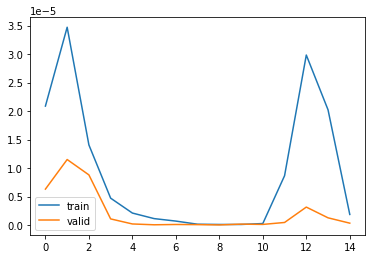

In [4]:
dl_layer = rnn()
train, valid, test, x_train, y_train, x_valid, y_valid, x_test = dl_layer.split(es_scaled)
y_pred_es_scaled = dl_layer.forecast_model(test, x_train, y_train, x_valid, y_valid, x_test)

     total_deaths_true  total_deaths_pred  total_cases_true  total_cases_pred
555           130630.0      130638.778152         6098117.0      6.104473e+06
556           130667.0      130675.897021         6123173.0      6.129526e+06
557           130813.0      130821.956791         6146642.0      6.152993e+06
558           130921.0      130930.098740         6176023.0      6.182370e+06
559           131016.0      131025.101820         6208908.0      6.215255e+06
560           131116.0      131125.216412         6241447.0      6.247791e+06
561           131210.0      131219.212275         6270673.0      6.277017e+06
562           131269.0      131278.103873         6297157.0      6.303504e+06
563           131296.0      131305.138944         6325515.0      6.331861e+06
564           131466.0      131475.205665         6352224.0      6.358568e+06
565           131577.0      131586.201186         6385982.0      6.392327e+06
566           131691.0      131700.070528         6422515.0     

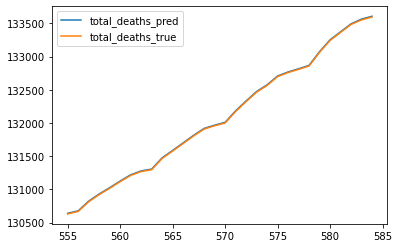

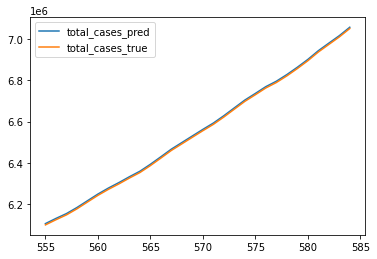

In [5]:
forecasts = dl_layer.reTS(y_pred_es_scaled, es_scaled, train, valid, df_trend, df_seas, df_scaler, df)

### prediction intervals

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               101400    
_________________________________________________________________
dense_flipout (DenseFlipout) (None, 2)                 602       
Total params: 102,002
Trainable params: 102,002
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
17/17 [==============================] - 3s 61ms/step - loss: 755.4145 - val_loss: 751.3983
Epoch 2/15
17/17 [==============================] - 1s 30ms/step - loss: 750.1298 - val_loss: 746.1740
Epoch 3/15
17/17 [==============================] - 0s 23ms/step - loss: 744.9136 - val_loss: 741.0205
Epoch 4/15
17/17 [==============================] - 1s 30ms/step - loss: 739.6693 - val_loss: 735.9217
Epoch 5/15
17/17 [==============================] - 0s 23ms/step - loss: 734.6542 - val_loss:

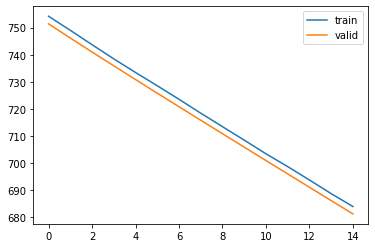

   total_deaths_lower  total_cases_lower  total_deaths_upper  \
0           -0.000335          -0.000179            0.000052   
1           -0.000313          -0.000182            0.000023   
2           -0.000315          -0.000193            0.000063   
3           -0.000278          -0.000184            0.000048   
4           -0.000308          -0.000174            0.000020   

   total_cases_upper  
0           0.000100  
1           0.000116  
2           0.000077  
3           0.000083  
4           0.000090  


In [6]:
pi_pred_es_scaled = dl_layer.pi_model(test, x_train, y_train, x_valid, y_valid, x_test)

     total_deaths_true  total_deaths_lower  total_cases_lower  \
555           130630.0       130585.197555       6.096855e+06   
556           130667.0       130625.234443       6.121888e+06   
557           130813.0       130770.875913       6.145284e+06   
558           130921.0       130883.821932       6.174726e+06   
559           131016.0       130974.870647       6.207684e+06   
560           131116.0       131075.635477       6.239953e+06   
561           131210.0       131169.803130       6.269114e+06   
562           131269.0       131226.111480       6.295624e+06   
563           131296.0       131256.323772       6.324294e+06   
564           131466.0       131423.597997       6.351000e+06   
565           131577.0       131533.114604       6.384529e+06   
566           131691.0       131651.608958       6.421211e+06   
567           131805.0       131766.049944       6.458309e+06   
568           131909.0       131869.225823       6.490010e+06   
569           131958.0   

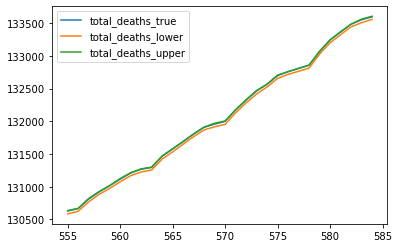

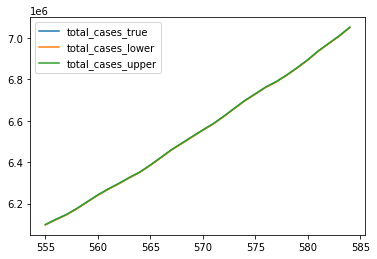

In [7]:
pi = dl_layer.reTS_pi(pi_pred_es_scaled, es_scaled, train, valid, df_trend, df_seas, df_scaler, df)

In [8]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

47.94181776747234
1997.6978984262485


In [9]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

93.33333333333333
100.0


In [10]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

0.0070328731120735625
0.09683229338297773


In [11]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

945.7599420783077
644521.4688282369


# RNN

[INFO] data shape: train = (527, 20), valid = (14, 20), test = (44, 20), x_train = (527, 18), y_train = (527, 2), x_valid = (14, 18), y_valid = (14, 2), x_test = (44, 18)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               101400    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 302       
Total params: 101,702
Trainable params: 101,702
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
17/17 [==============================] - 2s 52ms/step - loss: 0.5394 - val_loss: 0.6576
Epoch 2/15
17/17 [==============================] - 0s 23ms/step - loss: 0.0640 - val_loss: 0.3686
Epoch 3/15
17/17 [==============================] - 0s 23ms/step - loss: 0.0694 - val_loss: 0.4670
Epoch 4/15
17/17 [===================

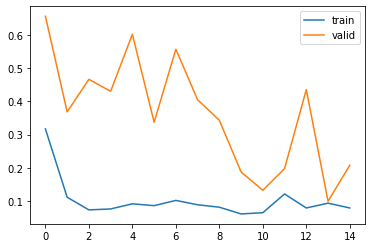

     total_deaths_true  total_deaths_pred  total_cases_true  total_cases_pred
555           130630.0      107870.194383         6098117.0      3.326285e+06
556           130667.0      108041.685588         6123173.0      3.333350e+06
557           130813.0      108195.976709         6146642.0      3.340306e+06
558           130921.0      108354.663408         6176023.0      3.347509e+06
559           131016.0      108526.409429         6208908.0      3.354864e+06
560           131116.0      108719.273331         6241447.0      3.363439e+06
561           131210.0      108912.615013         6270673.0      3.372073e+06
562           131269.0      109106.163733         6297157.0      3.380156e+06
563           131296.0      109276.556044         6325515.0      3.388218e+06
564           131466.0      109442.632408         6352224.0      3.397268e+06
565           131577.0      109626.864416         6385982.0      3.405986e+06
566           131691.0      109816.702377         6422515.0     

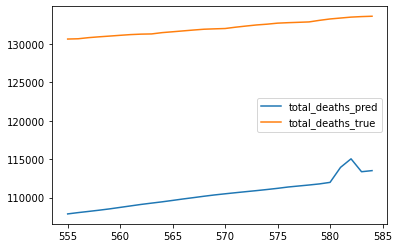

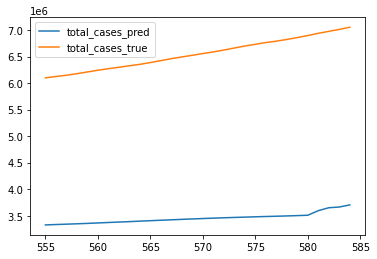

In [12]:
dl_layer = rnn(results_path = 'results/pure_rnn/')
train, valid, test, x_train, y_train, x_valid, y_valid, x_test = dl_layer.split(scaled_df)
y_pred_scaled = dl_layer.forecast_model(test, x_train, y_train, x_valid, y_valid, x_test)

forecasts = dl_layer.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)

### prediction intervals

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150)               101400    
_________________________________________________________________
dense_flipout_1 (DenseFlipou (None, 2)                 602       
Total params: 102,002
Trainable params: 102,002
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
17/17 [==============================] - 3s 49ms/step - loss: 757.2593 - val_loss: 753.6774
Epoch 2/15
17/17 [==============================] - 0s 21ms/step - loss: 751.6058 - val_loss: 748.0047
Epoch 3/15
17/17 [==============================] - 1s 31ms/step - loss: 746.4995 - val_loss: 743.0921
Epoch 4/15
17/17 [==============================] - 0s 26ms/step - loss: 741.2598 - val_loss: 738.3074
Epoch 5/15
17/17 [==============================] - 1s 34ms/step - loss: 736.2812 - val_loss:

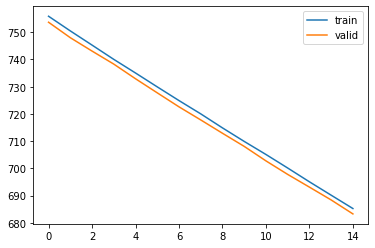

   total_deaths_lower  total_cases_lower  total_deaths_upper  \
0            1.181674           0.769001            1.937282   
1            1.163586           0.821191            1.934099   
2            1.182983           0.914260            2.018234   
3            1.172049           0.816904            2.040274   
4            1.110456           0.804434            1.946170   

   total_cases_upper  
0           1.715010  
1           1.749761  
2           1.719966  
3           1.647406  
4           1.756747  
     total_deaths_true  total_deaths_lower  total_cases_lower  \
555           130630.0        24272.069211      -1.628892e+06   
556           130667.0        21855.649355      -1.260869e+06   
557           130813.0        24446.939118      -6.045971e+05   
558           130921.0        22986.190951      -1.291103e+06   
559           131016.0        14757.634263      -1.379033e+06   
560           131116.0        14193.316238      -7.548936e+05   
561           131210.0

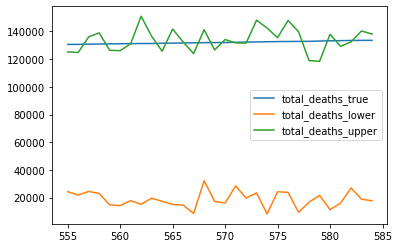

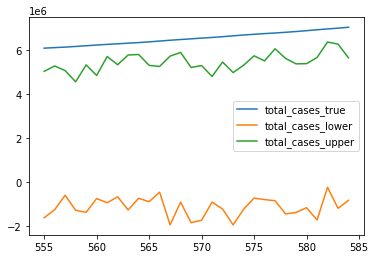

In [13]:
pi_pred_scaled = dl_layer.pi_model(test, x_train, y_train, x_valid, y_valid, x_test)

pi = dl_layer.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [14]:
pi.head()

,total_deaths_true,total_deaths_lower,total_cases_lower,total_cases_true,total_deaths_upper,total_cases_upper
555,130630.0,24272.069211,-1.628892e+06,6098117.0,125219.116970,5.041907e+06
556,130667.0,21855.649355,-1.260869e+06,6123173.0,124793.821010,5.286951e+06
557,130813.0,24446.939118,-6.045971e+05,6146642.0,136034.019192,5.076849e+06
558,130921.0,22986.190951,-1.291103e+06,6176023.0,138978.426674,4.565191e+06
559,131016.0,14757.634263,-1.379033e+06,6208908.0,126406.448305,5.336212e+06


In [15]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

164934.3712819906
28334546.53845141


In [16]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

53.333333333333336
0.0


In [17]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

17.784046570467414
61.85157217561912


In [18]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

8231.84096017319
1182163.2837234242


# VARMAX

In [ ]:
bench = stats()
train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_varmax(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [20]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

487494.82137657516
2630313.1500655934


In [21]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
0.0


In [22]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

20.2234554799162
4.600954387160292


In [23]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

11365.36380326839
113285.0713131645


# SARIMAX

                               SARIMAX Results                                
Dep. Variable:           total_deaths   No. Observations:                  527
Model:               SARIMAX(1, 0, 0)   Log Likelihood                1689.393
Date:                Tue, 07 Sep 2021   AIC                          -3338.786
Time:                        13:43:02   BIC                          -3253.442
Sample:                    01-31-2020   HQIC                         -3305.373
                         - 07-10-2021                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
reproduction_rate          -0.2276      0.015    -15.148      0.000      -0.257      -0.198
icu_patients               -0.0775      0.071     -1.087      0.277      -0.217       0.062


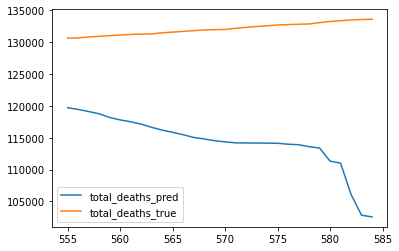

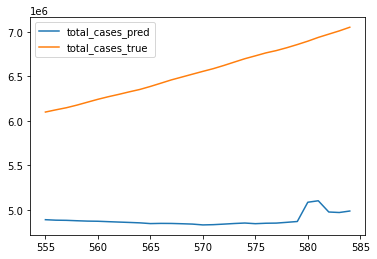

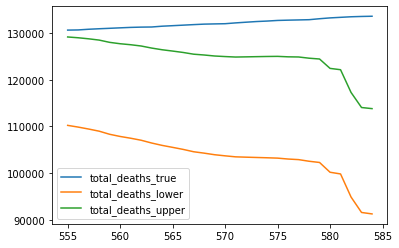

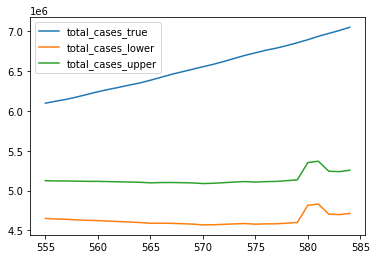

In [24]:
bench = stats(results_path = 'results/sarimax/')
# train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_sarimax(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [25]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

165758.80193036125
28685597.35569947


In [26]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
0.0


In [27]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

14.466115643813499
29.047420398185594


In [28]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

6777.784868479636
636037.6986457006


# MLR

                            OLS Regression Results                            
Dep. Variable:           total_deaths   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3326.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:43:04   Log-Likelihood:                 820.64
No. Observations:                 527   AIC:                            -1627.
Df Residuals:                     520   BIC:                            -1597.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
reproduction_rate         

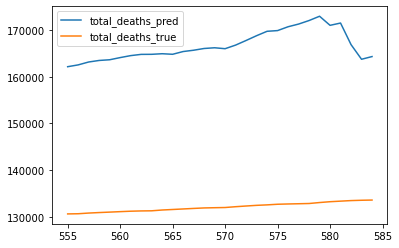

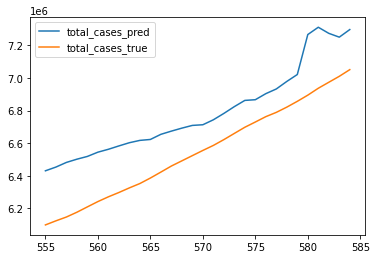

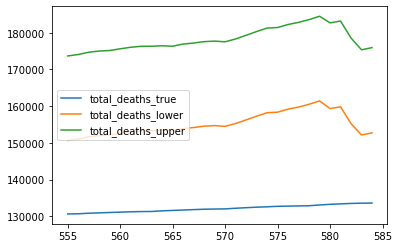

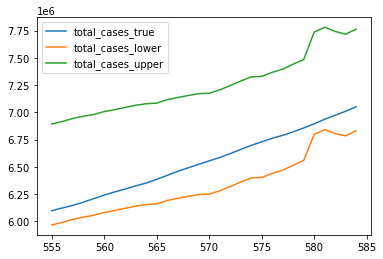

In [29]:
bench = stats(results_path = 'results/mlr/')
# train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_mlr(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [30]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

483771.47220657114
927540.7521477191


In [31]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
100.0


In [32]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

23.132161876586878
3.621974255146888


In [33]:
print(mase(train, forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(mase(train, forecasts['total_cases_true'], forecasts['total_cases_pred']))

13201.378771268302
91756.79811921001
